In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Where are the folders?

In [2]:
ga_folder = '../ga/'

list_of_dirs = ['20pop_test_run',
            '50pop_test_run',
            '100pop_test_run',
            'rbf_cost_eva2',
            'rbf_new_eva2']

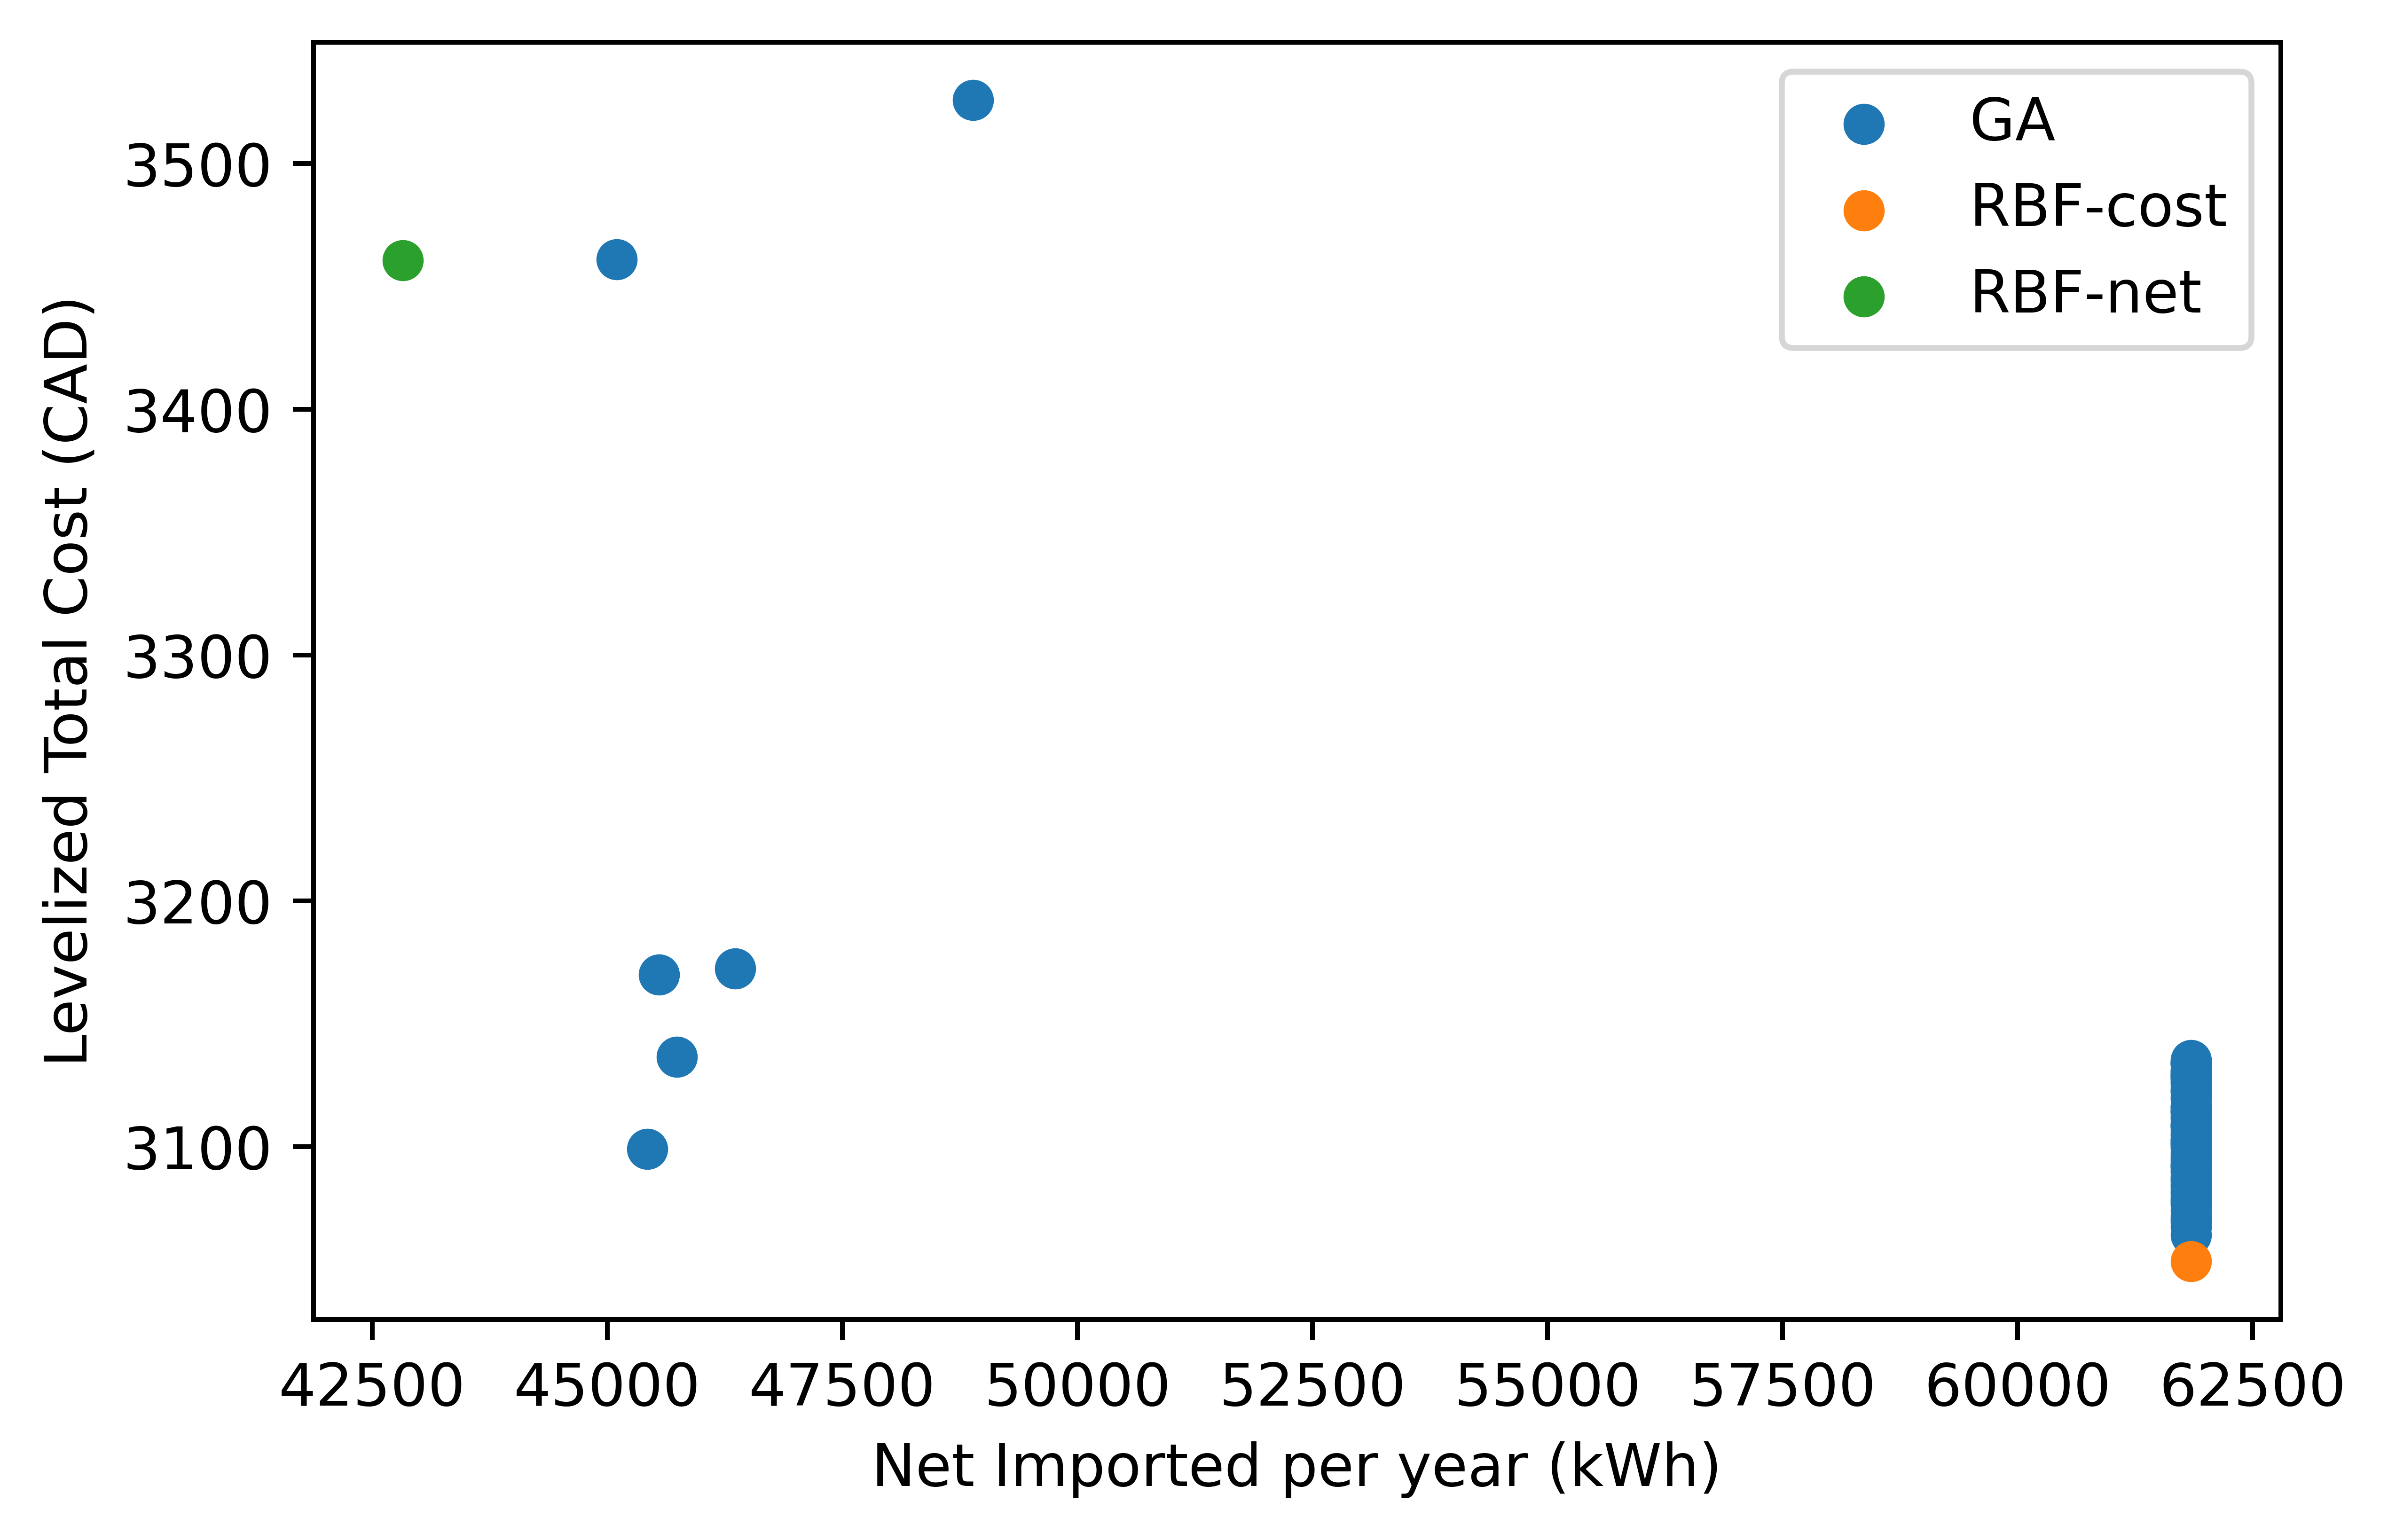

In [3]:

sols=pd.read_excel('source/panel_106_ga-100_processed_400_7.xlsx')  
sols2=pd.read_excel('source/panel_106_rbf-cost_processed_400_5.xlsx')  
sols3=pd.read_excel('source/panel_106_rbf-net_processed_400_3.xlsx')  

fig, ax = plt.subplots(dpi=900)
ax.scatter(sols['Energy Imported'],sols['total_cost'], label='GA')
ax.scatter(sols2['Energy Imported'],sols2['total_cost'], label='RBF-cost')
ax.scatter(sols3['Energy Imported'],sols3['total_cost'], label='RBF-net')
ax.set_ylabel('Levelized Total Cost (CAD)')
ax.set_xlabel('Net Imported per year (kWh)')
ax.legend()
plt.savefig('difference_between_ga_and_rbf.png')


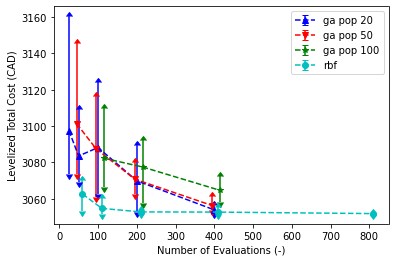

In [4]:
ga_20 = pd.read_csv('source/ga_20pop_cost.csv')
ga_50 = pd.read_csv('source/ga_50pop_cost.csv')
ga_100 = pd.read_csv('source/ga_100pop_cost.csv')
rbf = pd.read_csv('source/rbfcost.csv')

fig, ax = plt.subplots()
df=ga_20
ax.errorbar(df['evaluations'], df['mean'], yerr=[df['mean']-df['min'],df['max']-df['mean']], uplims=True, lolims=True,
             label='ga pop 20', fmt="b^--")
df=ga_50
ax.errorbar(df['evaluations']-5, df['mean'], yerr=[df['mean']-df['min'],df['max']-df['mean']], uplims=True, lolims=True,
             label='ga pop 50', fmt="rv--")
df=ga_100
ax.errorbar(df['evaluations']+15, df['mean'], yerr=[df['mean']-df['min'],df['max']-df['mean']], uplims=True, lolims=True,
             label='ga pop 100', fmt="g*--")
df=rbf
ax.errorbar(df['evaluations']+10, df['mean'], yerr=[df['mean']-df['min'],df['max']-df['mean']], uplims=True, lolims=True,
             label='rbf', fmt="co--")
ax.set_ylabel('Levelized Total Cost (CAD)')
ax.set_xlabel('Number of Evaluations (-)')

ax.legend()

<ipython-input-12-3e749753bebd>:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


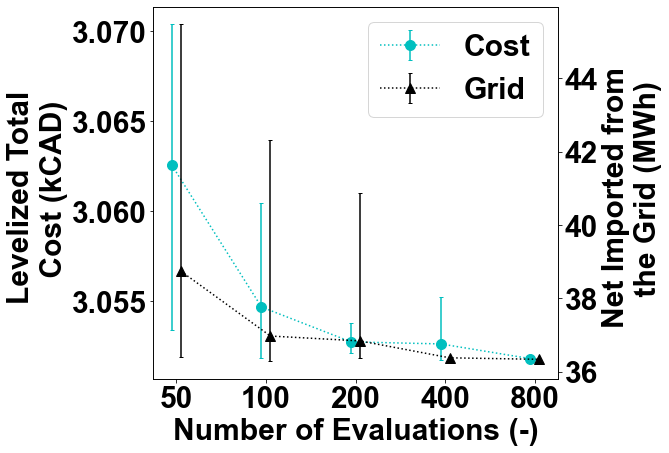

In [12]:
import matplotlib

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
#plt.subplots_adjust(wspace=0.25)
# Load the data 
rbf = pd.read_csv('source/rbfcost.csv')
#print("ga_20:\n",ga_20,"\n","ga_50:\n",ga_50,"\n","ga_100:\n",ga_100,"\n","rbf cost:\n",rbf)
# Some information to set the axis correctly
x  = rbf['evaluations']
xi = np.array(range(len(x)))
w = 0.1
dimw = w

m_size=10

# Set the axis
ax.set_xticklabels(map(int, x))
ax.set_xticks(xi)
# Set the lines
df=rbf/1000
ln0 = ax.errorbar(xi-dimw/2, df['mean'], yerr=[df['mean']-df['min'],df['max']-df['mean']], uplims=False, lolims=False,
             label='Cost', fmt="co:", markersize=m_size,capsize=2)

# Set the title axis
ax.set_ylabel('Levelized Total \n Cost (kCAD)', fontweight="bold")
ax.set_xlabel('Number of Evaluations (-)', fontweight="bold")



# Load the data 

rbf = pd.read_csv('source/rbfnet.csv')
# print("ga_20:\n",ga_20,"\n","ga_50:\n",ga_50,"\n","ga_100:\n",ga_100,"\n","rbf net:\n",rbf)

ax2 = ax.twinx()

# Set the lines

df=rbf/1000
ln1 = ax2.errorbar(xi+dimw*.5, df['mean'], yerr=[df['mean']-df['min'],df['max']-df['mean']], uplims=False, lolims=False,
             label='Grid', fmt="k^:", markersize=m_size, capsize=2)

# Set the title axis
ax2.set_ylabel('Net Imported from \n the Grid (MWh)', fontweight="bold")

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)


fig.show()
plt.tight_layout()
plt.savefig('optimization_results.pdf', bbox_inches='tight')
